# Point and interval estimation
# _Solution_

In this programming assignment, you will explore the behaviour of the maximum likelihood estimators and confidence intervals using simulations. 

# Point estimation (15% from all exercise 4)

#Q1
A. Draw 10 samples of size $n=10$ from $Exp(1.5)$ distribution.

B. For each sample, estimate the parameter $\lambda$ (as if it was unknown to us) using the MLE estimator. 

**Remark:** $\lambda$ is the parameter of the exponential distribution. 

C. At this point, you should have 10 different estimators for $\lambda$. Do you think that they are good estimators? Why? 

D. Repeat A and B for $n=50$ and $n=100$. 

E. Compare between all the 30 estimators. Does the sample size affect the goodness of estimation? How can we see that? 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#A
lam_0 = 1.5 
X = np.array([np.random.exponential(scale=1/lam_0, size=10)])
for k in range(9):
  X= np.append(X, np.array([np.random.exponential(scale=1/lam_0, size=10)]), axis=0)

In [ ]:
#B
X_mean = np.mean(X, axis = 1) #Get the mean for each row 
#print(X_mean)
X_MLE = 1/X_mean 
print(X_MLE)
#C
plt.scatter(range(10),X_MLE)
plt.plot([0, 10 ], [1.5,1.5], 'r-', lw=2)
plt.show()

The estimators are around 1.5, but the dispersion is quite high. 

In [ ]:
#D
#10 samples with n=50 each 
X50 = np.array([np.random.exponential(scale=1/lam_0, size=50)])
for k in range(9):
  X50= np.append(X50, np.array([np.random.exponential(scale=1/lam_0, size=50)]), axis=0)
X50_mean = np.mean(X50, axis = 1)
X50_MLE = 1/X50_mean

#10 samples with n=100 each 
X100 = np.array([np.random.exponential(scale=1/lam_0, size=100)])
for k in range(9):
  X100= np.append(X100, np.array([np.random.exponential(scale=1/lam_0, size=100)]), axis=0)
X100_mean = np.mean(X100, axis = 1)
X100_MLE = 1/X100_mean

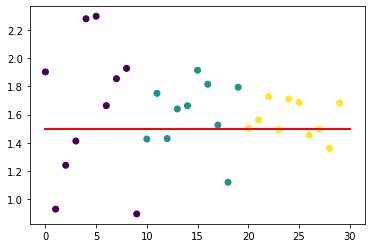

In [ ]:
df = pd.DataFrame(all_MLE.reshape(1,30)).transpose()
df.columns = ['MLE']
df['round'] = np.repeat([1,2,3],10)

plt.scatter(range(30), df['MLE'], c = df['round'])
plt.plot([0, 30 ], [1.5,1.5], 'r-', lw=2)
plt.show()

We see that as $n$ grows, the MLE has lower dispersion around the true parameter. 

# Q2
Draw a sample of 200 observations $X_1,...,X_{200}$ from $Exp(3)$ distribution. Compute the log-likelihood for different values of $\theta$ and make a plot. At which point approximately the maximum is attained? 

Recall that in this case, 
$$\ell(\theta;X)=n\log \theta -\theta \sum_{i=1}^nX_i$$



In [ ]:
from math import log 
def l(theta,sum_X,n):
  """
  @param theta: parameter of exponential distribution 
  @param sum_X: sum of the sample 
  @param n: number of observations
  return: log-likelihood functions at those points 
  """
  l = n*log(theta)-theta*sum_X 
  return(l)

sample = np.array([np.random.exponential(scale=1/3, size=200)])
sum_sample = np.sum(sample)
n=200
x = np.array([np.arange(0.0001,10,0.001)])
l_vec = np.vectorize(l)
y = l_vec(x, sum_sample, n)

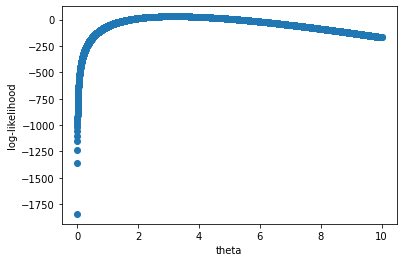

In [ ]:
plt.scatter(x, y)
plt.xlabel('theta')
plt.ylabel('log-likelihood')
plt.show()

In [ ]:
n/sum_sample

2.8421936273949924

indeed, the maximum is obtained for $\hat{\theta}\approx 2.8$



# Confidence intervals (15% from all exercise 4)

# Q3
In this exercise, we will reproduce the graph from slide 24 (lecture 4). 

A. Draw 100 samples of size 100 each from normal distribution with $\mu = 5, \sigma^2=1$. 

B. For each sample, compute the confidence interval for $\mu$ with confidence level 95%. 

C. Reproduce the graph from the lecture for your confidence interval. 

D. Calculate the average coverage of your confidence intervals. 

E. Repeat B-D for confidence level of 90%. Discuss the results. 

In [ ]:
#A
mu = 5
sigma2 =1

Y = np.array([np.random.normal(mu, sigma2, 100)])
for k in range(99):
  Y= np.append(Y, np.array([np.random.normal(mu, sigma2, 100)]), axis=0)

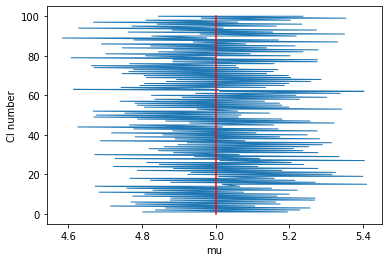

In [ ]:
from scipy.stats import norm
#B 
n=100
alpha = 0.05
z = norm.ppf(1-alpha/2)
Y_mean = np.mean(Y, axis = 1)
dev = z*sigma2/(n**0.5)
Ls = Y_mean - dev #lower bounds of CI's 
Us = Y_mean + dev #upper bounds of CI's 

#C
Y_axis = np.repeat(np.arange(1,101,1),2)
limits = np.dstack((Ls, Us)).flatten()
plt.plot(limits, Y_axis, '-', lw=1)
plt.plot([5,5], [0,100], 'r-', lw=1.5)
plt.xlabel('mu')
plt.ylabel('CI number')
plt.show()

In [ ]:
#D
#for the avg. coverage, we need to check the proportion of CI's that contain the value of the true parameter (5)
CI_coverage = np.mean((Ls<=5) & (Us>=5))
print(CI_coverage)

0.94


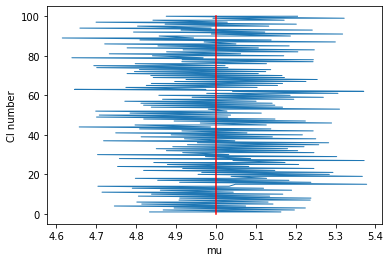

0.91


In [ ]:
#E
#only alpha changes 
alpha = 0.1
z = norm.ppf(1-alpha/2)
dev = z*sigma2/(n**0.5)
Ls = Y_mean - dev #lower bounds of CI's 
Us = Y_mean + dev #upper bounds of CI's 


Y_axis = np.repeat(np.arange(1,101,1),2)
limits = np.dstack((Ls, Us)).flatten()
plt.plot(limits, Y_axis, '-', lw=1)
plt.plot([5,5], [0,100], 'r-', lw=1.5)
plt.xlabel('mu')
plt.ylabel('CI number')
plt.show()
CI_coverage = np.mean((Ls<=5) & (Us>=5))
print(CI_coverage)